# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Ryan Smith - GitHub: https://github.com/RP1507/article-summarizer-Mod7 

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1:

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [261]:
import requests

# Scrape from site, dump into pkl file

from bs4 import BeautifulSoup

parser = 'html5lib'

soup = BeautifulSoup(response.text, parser)

article_page = requests.get('https://www.si.com/college/ncstate/basketball/jimmy-v-espy-speech')
article_html = article_page.text

import pickle

with open('jimmyv.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

## Question 2:

2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [262]:
#read file and print the speech

with open('jimmyv.pkl', 'rb') as f:
    article_html = pickle.load(f)
    
soup = BeautifulSoup(article_html, parser)

article_element = soup.find('article')

print(article_element.get_text())

Jimmy V's 'Don't Ever Give Up' SpeechIn honor of coach Jim Valvano, who died 27 years ago Tuesday, here is the transcript  his famous "Don't give up, don't ever give up" speech at the ESPY Awards on March 4, 1993Author:Brett FriedlanderPublish date:Apr 28, 2020 10:14 PM EDTTuesday is the 27th anniversary of Jim Valvano's death. In honor of his legacy at NC State and in the fight against cancer through the foundation he started, here is the transcript of his famous "Don't Ever Give Up" speech at the ESPY Awards on March 4, 1993:Thank you. Thank you very much. Thank you. That’s the lowest I’ve ever seen Dick Vitale since the owner of the Detroit Pistons called him in and told him he should go into broadcasting.I can’t tell you what an honor it is to even be mentioned in the same breath with Arthur Ashe. This is something I certainly will treasure forever. But, as it was said on the tape, and I also don’t have one of those things going with the cue cards, so I’m going to speak longer than

In [263]:
# Performing Sentiment Analysis on the Jimmy V Speech
# Display polarity score and sentence count

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())
print(f'The polarity from Jimmy V Espy\'s speech is: {doc._.polarity}')
print("Article Sentence Count: ", len(sentences))


The polarity from Jimmy V Espy's speech is: 0.22666534391534393
Article Sentence Count:  152


## Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [252]:
import spacy
from collections import Counter

# Remove whitespace, punctuation, and stopwords, set to lowercase

def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

# Get the top 5 tokens into a set and display along with frequency

interesting_tokens = [str(token).lower() for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print('The top 5 most frequent tokens are: ', word_freq.most_common(5))

top_tokens = set()
for token, freq in word_freq.most_common(5):
    top_tokens.add(token)
print('Most Frequent Tokens:', top_tokens)

The top 5 most frequent tokens are:  [('said', 14), ('going', 13), ('coach', 11), ('day', 11), ('things', 10)]
Most Frequent Tokens: {'said', 'coach', 'going', 'things', 'day'}


## Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [253]:
# Get the top 5 lemmas add to set and display with frequency

interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print('The top 5 most frequent lemmas ', lemma_freq.most_common(5))

top_lemmas = set()
for token, freq in lemma_freq.most_common(5):
    top_lemmas.add(token)
print('Most Frequent Lemmas:', top_lemmas)

The top 5 most frequent lemmas  [('go', 16), ('thing', 15), ('coach', 14), ('say', 14), ('get', 13)]
Most Frequent Lemmas: {'coach', 'thing', 'go', 'say', 'get'}


## Question 5

5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

The scores or each sentence by token:
[0.016129032258064516, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1111111111111111, 0.0, 0.0, 0.05, 0.045454545454545456, 0.0, 0.041666666666666664, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.05263157894736842, 0.16666666666666666, 0.1111111111111111, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.07692307692307693, 0.14285714285714285, 0.07142857142857142, 0.0625, 0.08333333333333333, 0.0, 0.0, 0.04, 0.07692307692307693, 0.16666666666666666, 0.0, 0.0, 0.058823529411764705, 0.0, 0.0, 0.08333333333333333, 0.0, 0.06666666666666667, 0.047619047619047616, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.16666666666666666, 0.0, 0.09375, 0.0, 0.0, 0.2, 0.16666666666666666, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.2222222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.04, 0.125, 0.0, 0.2, 0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

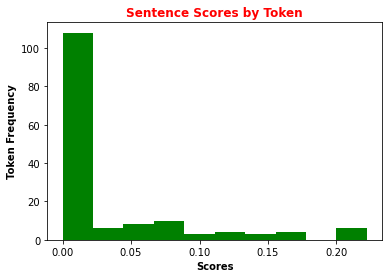

In [254]:
import matplotlib.pyplot as plt
sentences = list(doc.sents)

def sentence_len(sentence):
    count = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count += 1
    return count

def score_sentence_by_token(sentence, top_tokens):
    tokens = 0
    if sentence_len(sentence) == 0:
        return 0
    for token in sentence:
        if str(token).lower() in top_tokens:
            tokens += 1
    return tokens/sentence_len(sentence)

# make a list of token scores
token_scores_list = []

for sentence in sentences:
    token_scores_list.append(score_sentence_by_token(sentence, top_tokens))
print('The scores or each sentence by token:')
print(token_scores_list)

# plot histogram
plt.hist(token_scores_list, color = 'g')
plt.title('Sentence Scores by Token',fontweight = 'bold', color = 'red')
plt.ylabel('Token Frequency',fontweight = 'bold')
plt.xlabel('Scores', fontweight = 'bold')
plt.show()

### The range that the most common score falls in appears to be in the 0.00 to 0.025 range by quite a large margin.

## Question 6

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

The scores or each sentence by lemmas:
[0.016129032258064516, 0.0, 0.0, 0.0, 0.03571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.041666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15789473684210525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.08333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.058823529411764705, 0.0, 0.0, 0.08333333333333333, 0.0, 0.06666666666666667, 0.047619047619047616, 0.0, 0.0, 0.0, 0.0, 0.045454545454545456, 0.0, 0.0, 0.0, 0.125, 0.2, 0.07142857142857142, 0.08333333333333333, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045454545454545456, 0.05555555555555555, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.14285714285714285, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.043478260869565216, 0.06666666666666667, 0.0, 0.0, 0.0, 0.0, 0.041666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

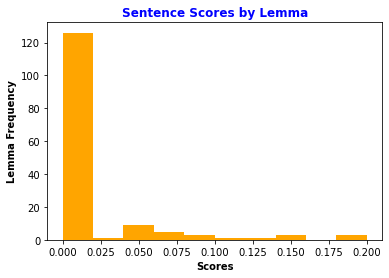

In [215]:
def sentence_lemma_len(sentence):
    count = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count += 1
    return count

def score_sentence_by_lemma(sentence, top_lemmas):
    lemmas = 0
    if sentence_lemma_len(sentence) == 0:
        return 0
    for lemma in sentence:
        if str(lemma).lower() in top_lemmas:
            lemmas += 1
    return lemmas/sentence_lemma_len(sentence)

# make a list of token scores
lemma_scores_list = []

for sentence in sentences:
    lemma_scores_list.append(score_sentence_by_lemma(sentence, top_lemmas))
print('The scores or each sentence by lemmas:')
print(lemma_scores_list)

# plot histogram
plt.hist(lemma_scores_list, color = 'orange')
plt.title('Sentence Scores by Lemma',fontweight = 'bold', color = 'blue')
plt.ylabel('Lemma Frequency',fontweight = 'bold')
plt.xlabel('Scores', fontweight = 'bold')
plt.show()

#### Lemmas didn't change the range much, but it did have even more fall into that range, so the most common range is the 0.00 to 0.025 range again.

## Question 7

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.15
* Cutoff Score (lemmas): 0.175

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [216]:
# Setting the cutoffs for tokens and lemmas to create summaries

token_cutoff = 0.15
lemma_cutoff = 0.175

print('Cutoff Score (tokens):',token_cutoff)
print('Cutoff Score (lemmas):',lemma_cutoff)

Cutoff Score (tokens): 0.15
Cutoff Score (lemmas): 0.175


## Question 8

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [256]:
#get sentences that are over the token cutoff score, print the summary

token_sentence = []
token_scores = []

for sentence in sentences:
    tokens = 0
    words = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            words += 1
        if token.text.lower() in top_tokens:
            tokens += 1
    if tokens != 0:
        token_score = tokens/words
        if token_score >= token_cutoff:
            sent_str = str(sentence).replace('\n','').replace('  ',' ')
            token_sentence.append(sent_str)
            token_scores.append(token_score)

print(' '.join(token_sentence))

To me, there are three things we all should do every day. You should laugh every day. Those are the three things that I try to do every day. Where is this great coach? He said, “All eyes on me. I said, “That’s beautiful.” I’m going to do that. Then finally he said, three minutes, I said fine. “Let’s go,” I said. And those three things are going to carry on forever.


## Question 9

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [257]:
#Print token polarity score, token scores by sentence, and token summary sentence count

doc = nlp(' '.join(token_sentence))

print("Token summary polarity: ", doc._.blob.polarity)
print("Token scores from summary: ", token_scores)
print("Token summary sentence count: ", len(token_sentence))

Token summary polarity:  0.47333333333333333
Token scores from summary:  [0.16666666666666666, 0.2, 0.16666666666666666, 0.2, 0.16666666666666666, 0.2, 0.16666666666666666, 0.2222222222222222, 0.2, 0.2]
Token summary sentence count:  10


## Question 10

10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [258]:
#get sentences that meet the lemma cutoff score, then print the summary

lemma_sentence = []
lemma_scores = []

for sentence in sentences:
    lemmas = 0
    words = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            words += 1
        if token.lemma_.lower() in top_lemmas:
            lemmas += 1
    if lemmas != 0:
        lemma_score = lemmas/words
        if lemma_score >= lemma_cutoff:
            sent_str = str(sentence).replace('\n','').replace('  ',' ')
            lemma_sentence.append(sent_str)
            lemma_scores.append(lemma_score)

print(' '.join(lemma_sentence))

You get your squad ready. Where is this great coach? I said, “That’s beautiful.” I got it, I got it. Then finally he said, three minutes, I said fine. “Let’s go,” I said. You got a lot. know, I gotta go, I gotta go; and I got one last thing, and I said it before, and I’m gonna say it again. And those three things are going to carry on forever.


## Question 11

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [259]:
#Print lemma polarity score, lemma score by sentence, and lemma summary sentence count

doc = nlp(' '.join(lemma_sentence))

print("Lemma summary polarity: ", doc._.blob.polarity)
print("Lemma scores from summary: ", lemma_scores)
print("Lemma summary sentence count: ", len(lemma_sentence))

Lemma summary polarity:  0.37777777777777777
Lemma scores from summary:  [0.2, 0.2, 0.2, 0.3333333333333333, 0.2222222222222222, 0.4, 0.25, 0.32142857142857145, 0.2]
Lemma summary sentence count:  9


## Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

All three articles have a very positive polarity score, and they are as follows:
    
    Original - 0.22666534391534393
    Tokens - 0.47333333333333333
    Lemmas - 0.37777777777777777
    
Both the token summary and the lemma summary had a higher polarity than the original article which makes sense as it was looking for more sentences with more of the frequent words, which tended to be positive focused, and condensing them into a short paragraph. The token one being higher than lemmas suprised me a little. Looking at the summaries, the lemmas had more short sentences that seemed to have a lot of filler words and words like gotta go. The tokens had a few more diverse words that probably boosted its polarity over the lemmas in this article.

## Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I thought that overall both the summaries could be a bit better. Maybe add some custom words to exclude, and try different ways like pulling just noun tokens. However, from the two that we produced above, I would have to say the token summary turned out better. It grabbed a couple pieces from some of his key lines that people remember. The lemmas, as mentioned above, had shorter sentences with a lot of the same repeating words, so it did not turn out quite as good as the token summary did.